In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-48-9acfe8696075>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


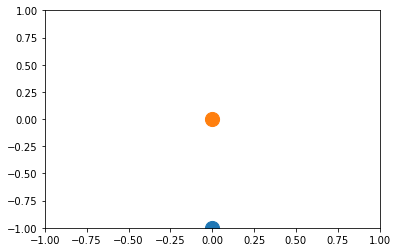

In [48]:
class State():
    def __init__(self, opx, dpx):
        self.opx = opx
        self.dpx = dpx
def get_init_state():
    return State(torch.tensor([0., -1.]), torch.tensor([0., 0.]))

def viz_state(s):
    plt.scatter(s.opx[0].detach().numpy(), s.opx[1].detach().numpy(), s=200)
    plt.scatter(s.dpx[0].detach().numpy(), s.dpx[1].detach().numpy(), s=200)
    plt.xlim(-1, 1);plt.ylim(-1, 1)
    return plt.gcf()

fig = viz_state(get_init_state())
fig.show()

In [62]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.main = torch.nn.Sequential(*[
            torch.nn.Linear(4, 10),
            torch.nn.ReLU(),
            torch.nn.Linear(10, 10),
            torch.nn.ReLU(),
            torch.nn.Linear(10, 10),
            torch.nn.ReLU(),
            torch.nn.Linear(10, 2),
            torch.nn.ReLU(),
        ])
        
    def forward(self, s):
        X = torch.cat([s.opx, s.dpx])
        X = self.main(X)
        X = torch.tanh(X)*.1
        return X
        
model_o = Model()
model_d = Model()

In [63]:
states = [get_init_state()]
for i in range(50):
    s = states[-1]
    om = model_o(s)
    dm = model_d(s)
    ns = State(s.opx+om, s.dpx+dm)
    states.append(ns)
    

In [65]:
def save_state_pngs(states):
    for i, s in enumerate(states):
        fig = viz_state(s)
        plt.savefig(f'data/{i:03d}.png')
        plt.close()
!rm data/*
save_state_pngs(states)

In [66]:
!rm data/out.gif
!ffmpeg -framerate 15 -i data/%03d.png data/out.gif -v quiet

rm: cannot remove 'data/out.gif': No such file or directory


![ff](data/out.gif)
